<a href="https://colab.research.google.com/github/atulya97/Deep-Learning/blob/master/DNN_for_Fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 

In [0]:
tf.random.set_seed(42) 
np.random.seed(42)


In [0]:
fashionDB = keras.datasets.fashion_mnist


In [0]:
(X_train, y_train),(X_test, y_test) = fashionDB.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print("Shape of X_train: ", X_train.shape) 
print("Shape of X_test: ", X_test.shape) 

Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)


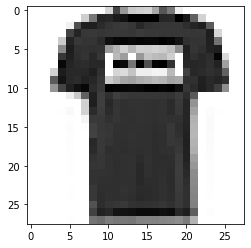

In [0]:
plt.imshow(X_train[1], cmap='binary') 
plt.show()


In [0]:
X_train=X_train.reshape((60000,28*28))
X_train=X_train.astype('float32')/255

In [0]:
X_test=X_test.reshape((10000,28*28))
X_test=X_test.astype('float32')/255


In [0]:
print("Shape of X_train: ", X_train.shape) 
print("Shape of X_test: ", X_test.shape) 

Shape of X_train:  (60000, 784)
Shape of X_test:  (10000, 784)


In [0]:
dnn=keras.models.Sequential()


In [0]:
dnn.add(keras.layers.Dense(50,activation="relu",input_shape=X_train.shape[1:]))

In [0]:
dnn.add(keras.layers.Dense(40,activation='relu'))
dnn.add(keras.layers.Dense(30,activation='relu'))
dnn.add(keras.layers.Dense(20,activation='relu'))


In [0]:
dnn.add(keras.layers.Dense(10,activation="softmax"))

In [0]:
dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 40)                4

In [0]:
dnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
dnn.fit(x=X_train,y=y_train,validation_split=0.3,epochs=50,batch_size=32)

Epoch 1/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3411 - accuracy: 0.9299 - val_loss: 0.5454 - val_accuracy: 0.8770
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1225 - accuracy: 0.9627 - val_loss: 0.5395 - val_accuracy: 0.8792
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1235 - accuracy: 0.9620 - val_loss: 0.5179 - val_accuracy: 0.8783
Epoch 4/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1106 - accuracy: 0.9653 - val_loss: 0.5636 - val_accuracy: 0.8762
Epoch 5/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1219 - accuracy: 0.9623 - val_loss: 0.4793 - val_accuracy: 0.8756
Epoch 6/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1115 - accuracy: 0.9640 - val_loss: 0.5881 - val_accuracy: 0.8668
Epoch 7/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1092 - accuracy: 0.9647 - val_loss: 0.5541 - val_accuracy:

In [0]:
test_loss,test_accuracy=dnn.evaluate(x=X_test,y=y_test)
print(test_loss,test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.8712
0.6605785489082336 0.8712000250816345
